<a href="https://colab.research.google.com/github/Dulon18/Machine_Learning_project/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


# **Dataset collected from-->**

https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

In [2]:
car_data=pd.read_csv("/content/car data.csv")

# **Data Preprocessing**

In [3]:
car_data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
#number of rows and columns
car_data.shape

(301, 9)

In [5]:
#getting information about dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#checking missing value
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [8]:
# encoding 3 columns
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [9]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# **Splitting the data into Training and Testing data**

In [10]:
x=car_data.drop(['Car_Name','Selling_Price'],axis=1)
y=car_data['Selling_Price']

In [11]:
print(x,y)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns] 0       3.35
1       4.75
2       7.25
3       2.85
4       4.60

In [12]:

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state = 2)


In [13]:
print(x.shape,x_test.shape,x_train.shape)

(301, 7) (61, 7) (240, 7)


# **Model Training**

Linear Regression

In [14]:
 model = LinearRegression()

In [15]:
model2 = Lasso()

In [16]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model2.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# **Evaluation Model**

In [18]:
# prediction on Training data
training_data_prediction =model.predict(x_train)

In [19]:
# R squared Error
error_score=metrics.r2_score(y_train,training_data_prediction)
print('R squared error: ',error_score)

R squared error:  0.8838169193709796


# Visualize actual prices and predict prices

Text(0, 0.5, 'Predicted Prices')

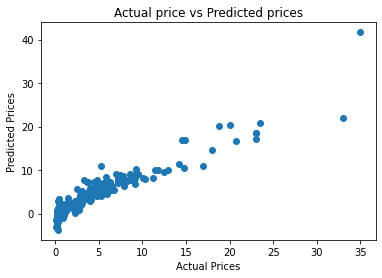

In [20]:
plt.scatter(y_train,training_data_prediction)
plt.title("Actual price vs Predicted prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")


In [21]:
# prediction on Test data 
testing_data_prediction =model.predict(x_test)

In [22]:
# R squared Error
error_score=metrics.r2_score(y_test,testing_data_prediction)
print('R squared error: ',error_score)

R squared error:  0.8401532365377697


Text(0, 0.5, 'Predicted Prices')

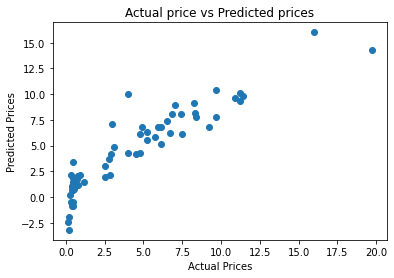

In [23]:
plt.scatter(y_test,testing_data_prediction)
plt.title("Actual price vs Predicted prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

In [24]:
# prediction on Training data for model 2
train_data_prediction =model2.predict(x_train)

In [25]:
# R squared Error for model2
error_score=metrics.r2_score(y_train,train_data_prediction)
print('R squared error: ',error_score)

R squared error:  0.843587395258283


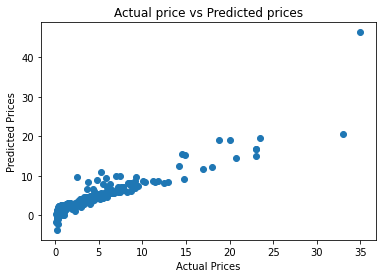

In [26]:
plt.scatter(y_train,train_data_prediction)
plt.title("Actual price vs Predicted prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

In [27]:
# prediction on Test data for model 2
test_data_prediction =model2.predict(x_test)

# R squared Error
error_score=metrics.r2_score(y_test,test_data_prediction)
print('R squared error: ',error_score)

R squared error:  0.8497457570738539


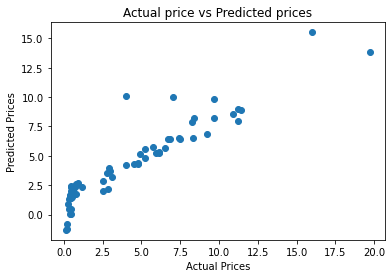

In [28]:
plt.scatter(y_test,test_data_prediction)
plt.title("Actual price vs Predicted prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()